# **CAVALO OU HUMANO?**
## **2TDSA**
André dos Santos Menezes de Souza  
RM: 88112

Giulio Cesar Costa Bernardi   
RM: 86993

Kaike de Santana Queiroz Ferreira	
RM: 88473

Raissa Rassilan		
RM: 89011

**imports necessários**

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

**Cria pastas de treino e validação para inserir imagens do dataset**

In [3]:
os.makedirs('Data', exist_ok=True)
os.makedirs('Data/train/horses', exist_ok=True)
os.makedirs('Data/train/humans', exist_ok=True)
os.makedirs('Data/validation/horses', exist_ok=True)
os.makedirs('Data/validation/humans', exist_ok=True)

**Insere dados do dataset "horses_or_humans" em seus devidos diretórios**

In [4]:
base_path = os.getcwd()
horse_counter = 0
human_counter = 0

for i, dataset in enumerate(tfds.load('horses_or_humans', split=['train', 'test'])):
    if i==0: #training set
        set_path = os.path.join(base_path, 'Data/train')
    else: #test set
        set_path = os.path.join(base_path, 'Data/validation')
        
    for row in list(dataset):
        im = Image.fromarray(row['image'].numpy())
        if row['label'] == 0: #0 is horse and 1 is human
            class_path = os.path.join(set_path, 'horses')
            file_path = os.path.join(class_path, "horse_{}.jpeg".format(horse_counter))
            horse_counter += 1
        elif row['label'] == 1: #0 is horse and 1 is human
            class_path = os.path.join(set_path, 'humans')
            file_path = os.path.join(class_path, "human_{}.jpeg".format(human_counter))
            human_counter += 1
        im.save(file_path) #saves the image in the proper folder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete3V89NC/horses_or_humans-train.tfrecord


  0%|          | 0/1027 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete3V89NC/horses_or_humans-test.tfrecord


  0%|          | 0/256 [00:00<?, ? examples/s]

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


**Imprimir quantidade de imagens em cada diretório**

In [5]:
dataset_dir = os.path.join(os.getcwd(), 'Data')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_horses_len = len(os.listdir(os.path.join(dataset_train_dir, 'horses')))
dataset_train_humans_len = len(os.listdir(os.path.join(dataset_train_dir, 'humans')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_horses_len = len(os.listdir(os.path.join(dataset_validation_dir, 'horses')))
dataset_validation_humans_len = len(os.listdir(os.path.join(dataset_validation_dir, 'humans')))

print('Train horses: %s'% dataset_train_horses_len)
print('Train humans: %s'% dataset_train_humans_len)
print('Validation horses: %s'% dataset_validation_horses_len)
print('Validation humans: %s'% dataset_validation_humans_len)

Train horses: 500
Train humans: 527
Validation horses: 128
Validation humans: 128


**Definição de alguns valores**

In [6]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['horse','human']

**Cria dataset de treino**

In [7]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 1027 files belonging to 2 classes.


**Cria dataset de validação**

In [8]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Found 256 files belonging to 2 classes.


**Cria dataset de teste e exibe cardinalidade do dataset de validação e teste**

In [9]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 7
Test Dataset Cardinality: 1


**Solicita que o tempo de execução tf.data ajuste o valor dinamicamente em tempo de execução com AUTOTUNE**

In [10]:
autotune = tf.data.AUTOTUNE

dataset_train = dataset_train.prefetch(buffer_size = autotune)
dataset_validation = dataset_validation.prefetch(buffer_size = autotune)
dataset_test = dataset_validation.prefetch(buffer_size = autotune)

**Cria função que exibe dataset**

In [11]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

**Dataset de treino**

<Figure size 432x288 with 0 Axes>

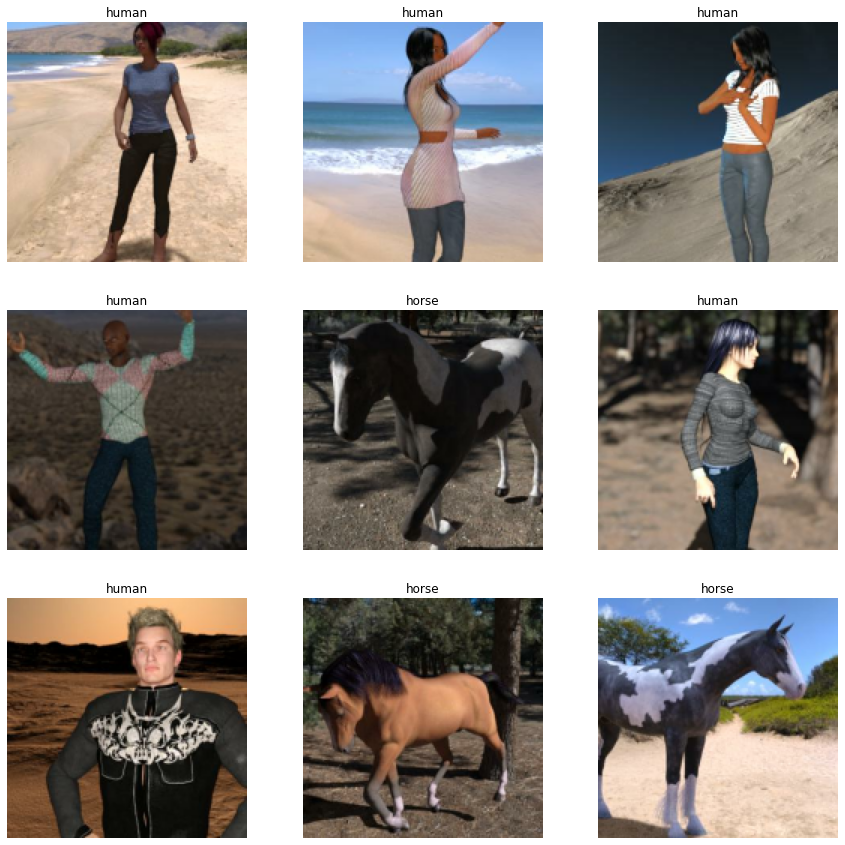

In [12]:
plot_dataset(dataset_train)

**Dataset de validação**

<Figure size 432x288 with 0 Axes>

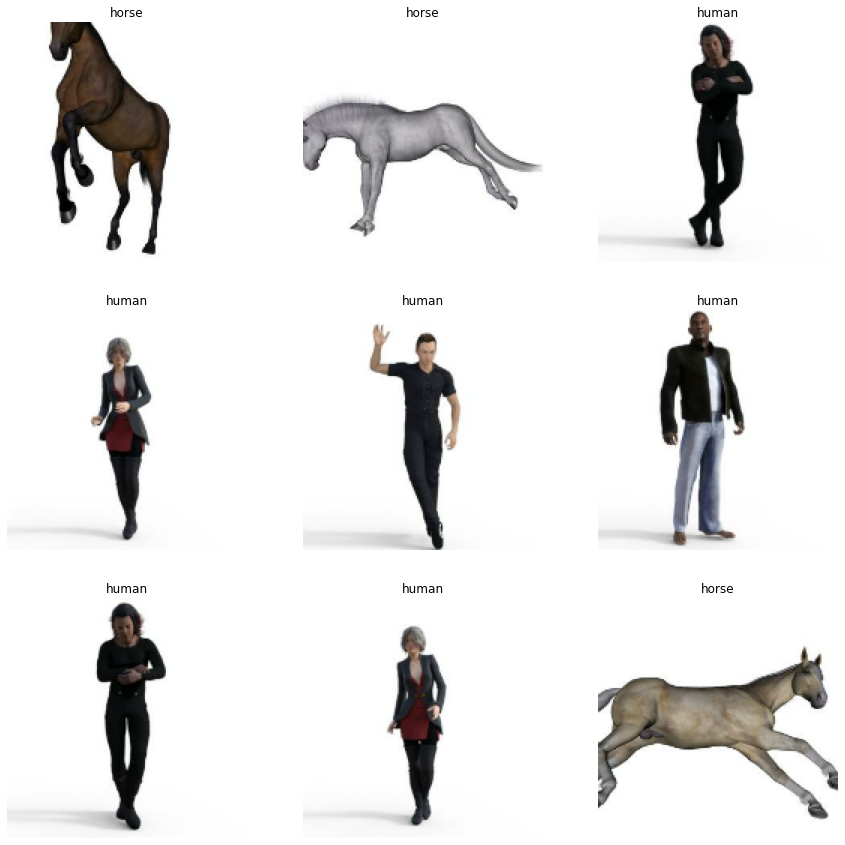

In [13]:
plot_dataset(dataset_validation)

**Dataset de teste**

<Figure size 432x288 with 0 Axes>

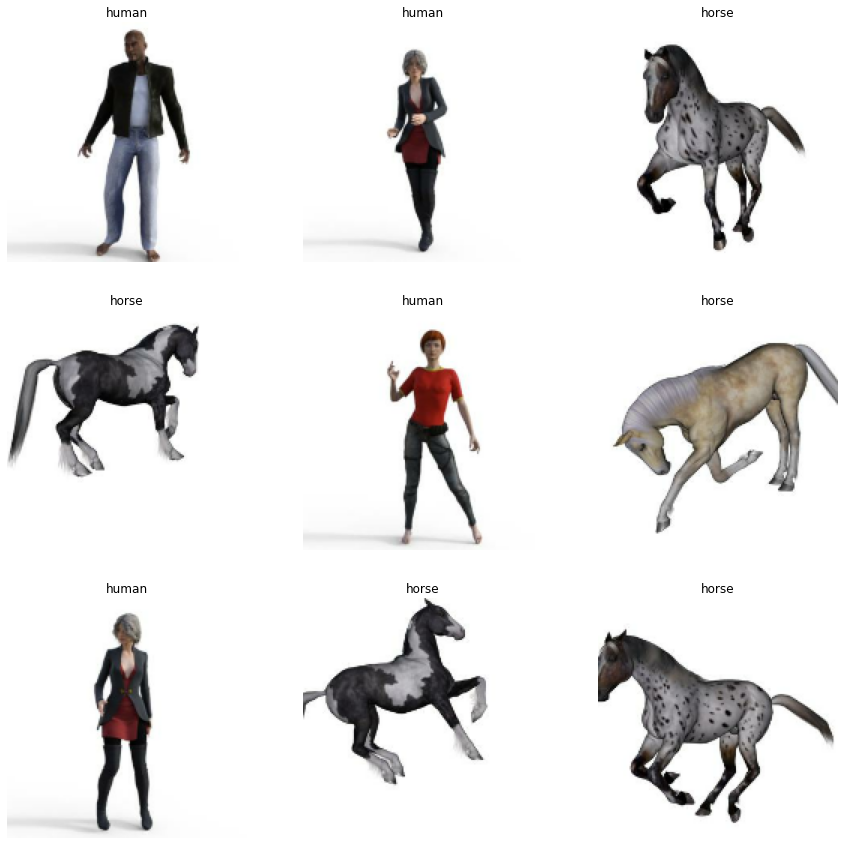

In [14]:
plot_dataset(dataset_test)

**Técnica para aumento de dados de imagem: augmentation**

In [15]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

**Cria função que aplica augmentation ao dataset**

In [16]:
def plot_dataset_data_augmentation(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, _ in dataset.take(1):

        feature = features[0]

        for i in range(9):

            feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(feature_data_augmentation[0] / image_color_channel_size)

**Aplica função de augmentation ao dataset de treino**

<Figure size 432x288 with 0 Axes>

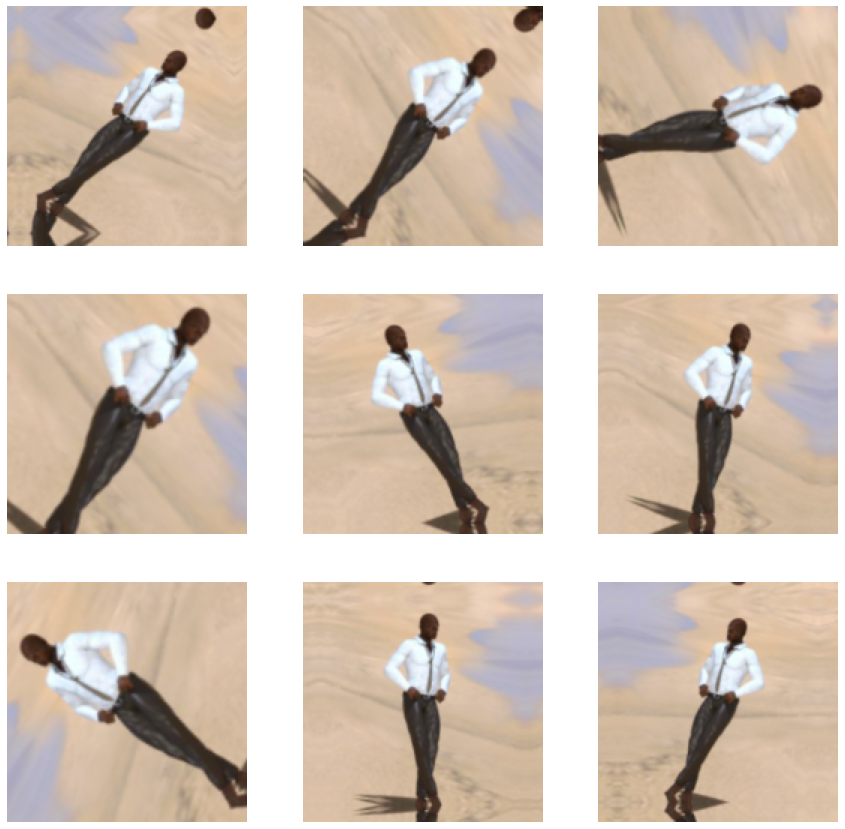

In [17]:
plot_dataset_data_augmentation(dataset_train)

**Técnica rescaling para aumento de performance**

In [18]:
rescaling = tf.keras.layers.experimental.preprocessing.Rescaling(1. / (image_color_channel_size / 2.), offset = -1, input_shape = image_shape)

**Técnica transfer learning, que faz nosso modelo ter o auxilio de outro modelo já criado**

In [19]:
model_transfer_learning = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False, weights = 'imagenet')
model_transfer_learning.trainable = False

model_transfer_learning.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

**Técnica para interromper o treinamento da rede neural no momento certo**

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

**Cria e compila a rede neural**

In [21]:
model = tf.keras.models.Sequential([
    rescaling,
    data_augmentation,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                

**Treina a rede neural**

In [22]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs,
    callbacks = [
        early_stopping
    ]
)

Epoch 1/20
33/33 [==============================] - 15s 73ms/step - loss: 0.8017 - accuracy: 0.5336 - val_loss: 0.7171 - val_accuracy: 0.5714
Epoch 2/20
33/33 [==============================] - 2s 45ms/step - loss: 0.6527 - accuracy: 0.6319 - val_loss: 0.5920 - val_accuracy: 0.6875
Epoch 3/20
33/33 [==============================] - 2s 46ms/step - loss: 0.5722 - accuracy: 0.6855 - val_loss: 0.4800 - val_accuracy: 0.8080
Epoch 4/20
33/33 [==============================] - 2s 46ms/step - loss: 0.4914 - accuracy: 0.7605 - val_loss: 0.4109 - val_accuracy: 0.8482
Epoch 5/20
33/33 [==============================] - 2s 45ms/step - loss: 0.4220 - accuracy: 0.8130 - val_loss: 0.3576 - val_accuracy: 0.9107
Epoch 6/20
33/33 [==============================] - 2s 46ms/step - loss: 0.3886 - accuracy: 0.8500 - val_loss: 0.3113 - val_accuracy: 0.9286
Epoch 7/20
33/33 [==============================] - 2s 46ms/step - loss: 0.3283 - accuracy: 0.8793 - val_loss: 0.2673 - val_accuracy: 0.9509
Epoch 8/20
3

**Função com configuração do gráfico da perda e precisão do modelo**

In [23]:
def plot_model():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')

    plt.show()

**Exibe o gráfico de perda e precisão do modelo**

<Figure size 432x288 with 0 Axes>

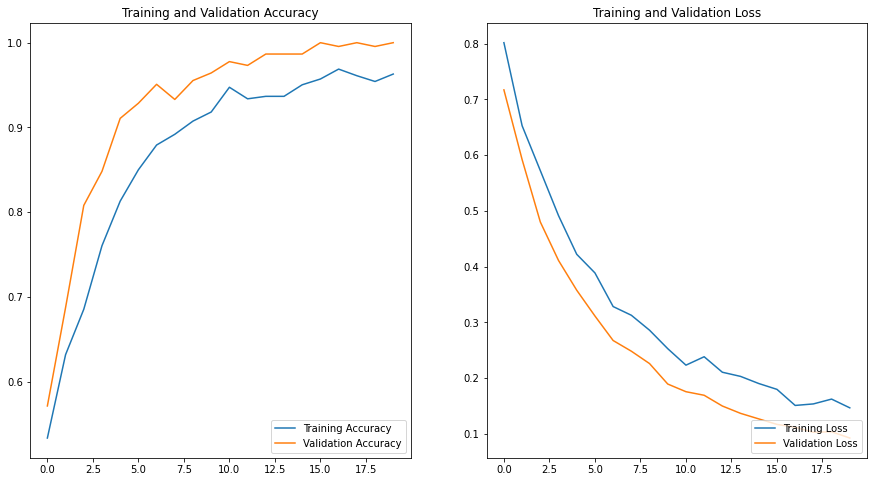

In [24]:
plot_model()

**Imprime perda e precisão do dataset de teste**

In [25]:
dataset_test_loss, dataset_test_accuracy = model.evaluate(dataset_test)

print('Dataset Test Loss:     %s' % dataset_test_loss)
print('Dataset Test Accuracy: %s' % dataset_test_accuracy)

7/7 [==============================] - 0s 29ms/step - loss: 0.0911 - accuracy: 1.0000
Dataset Test Loss:     0.09112579375505447
Dataset Test Accuracy: 1.0


**Função que recebe dataset para realizar uma predição**

In [26]:
def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

**Predição dataset de teste**

Labels:      [1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0]
Predictions: [1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0]


<Figure size 432x288 with 0 Axes>

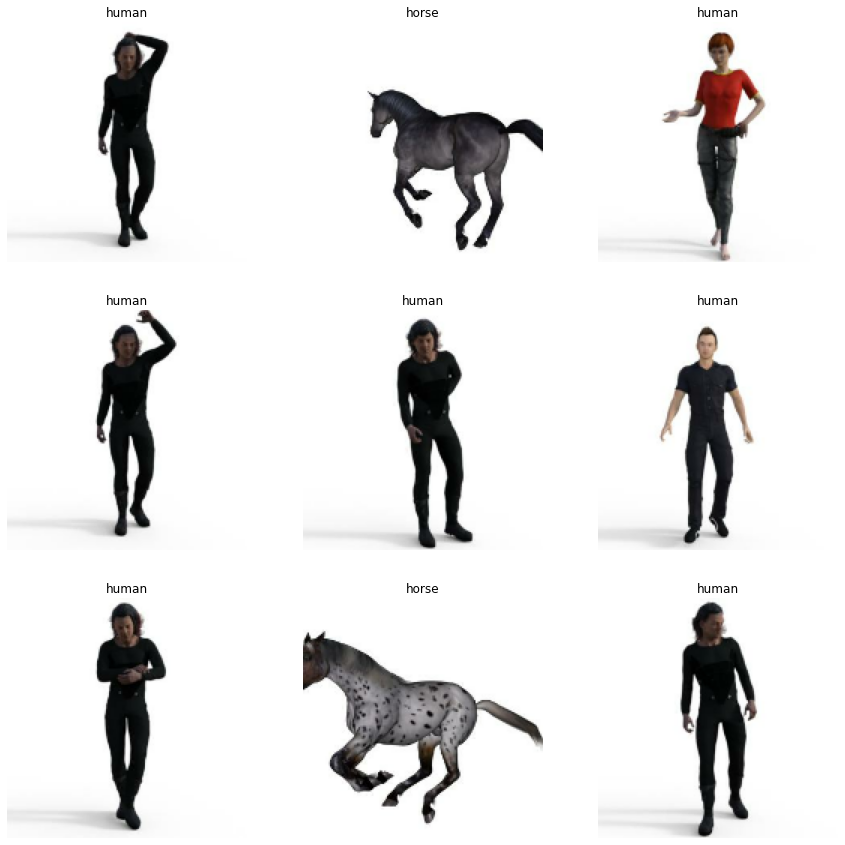

In [27]:
plot_dataset_predictions(dataset_test)

**Salva modelo**

In [28]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [29]:
import joblib
joblib.dump(model,'model.pkl')

INFO:tensorflow:Assets written to: ram://b3e65997-2485-4046-ad7b-17a0fcd4ca75/assets


INFO:tensorflow:Assets written to: ram://b3e65997-2485-4046-ad7b-17a0fcd4ca75/assets


['model.pkl']

**Carrega modelo**

In [30]:
model = tf.keras.models.load_model('model')

**Função que faz predição a partir de uma imagem recebida**

In [31]:
def predict(image_file):

    image = tf.keras.preprocessing.image.load_img(image_file, target_size = image_size)
    plt.imshow(image)

    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, 0)
    
    prediction = model.predict(image)[0][0]

    print('Prediction: {0} | is a {1}'.format(prediction, ('horse' if prediction < 0.5 else 'human')))

**Função que recebe uma url de imagem para fazer uma predição**

In [32]:
def predict_url(image_origin):

    image_file = tf.keras.utils.get_file(origin = image_origin)
    return predict(image_file)

**Predizendo se uma imagem é de uma cavalo ou um humano**

106496/95153 [=================================] - 0s 2us/step
Prediction: 0.9046093225479126 | is a human


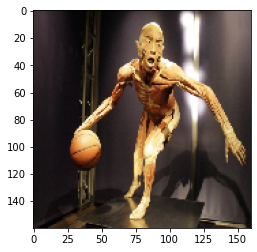

In [33]:
predict_url('http://www.espalhafactos.com/wp-content/uploads/2015/11/image1.jpg') #<<<----------- COLOQUE SUA URL AQUI-------

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
